# Chapter 7. Moving Beyond Linearity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
import scipy.interpolate as si
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table


sns.set()
%matplotlib inline

## Lab: Non-linear modeling

In [2]:
wage = pd.read_csv('data/wage.csv')
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
wage.isnull().any()

year          False
age           False
sex           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool

In [4]:
model = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.77e-57
Time:                        19:39:50   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:

# the summary table confidence interval is provided by (1-alpha)100%.
# This method returns an array with standard errors and confidence intervals
st, data, column_names = summary_table(model, alpha=0.05)
pd.DataFrame(st).head(5)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
1,,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
2,1.0,75.0431540173515,51.93145028991944,5.298268266298384,41.54283700236941,62.32006357746947,-27.018197958862444,130.88109853870134,23.111703727432058,39.561577569207756,0.5841957057198031,0.0012242423578347184
3,2.0,70.47601964694451,84.47675564486701,1.8256760582337008,80.89704967226263,88.0564616174714,6.131762394920159,162.82174889481388,-14.000735997922504,39.87301058757038,-0.3511331547732931,5.169672806715516e-05
4,3.0,130.982177377461,119.32598485811627,1.107729033126304,117.15399809298013,121.49797162325241,41.03268246894747,197.61928724728506,11.656192519344728,39.89941105800029,0.2921394629710337,1.3156626791038648e-05


In [37]:
fitted_values = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

order = np.argsort(wage['age'].values)
order

array([   0,  820,   29, ..., 2022, 1565,  328])

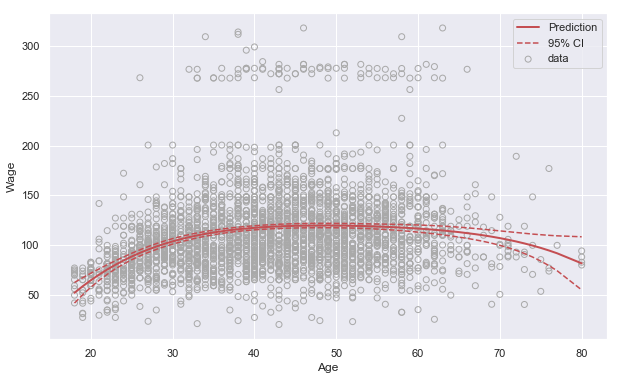

In [54]:
#  95% confidence intervals

fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.scatter(wage['age'], wage['wage'], facecolors='none', edgecolors='darkgray', label="data")
ax.plot(wage['age'].values[order], fitted_values[order], 'r', lw=2, label='Prediction')
ax.plot(wage['age'].values[order], predict_mean_ci_low[order], 'r--', label='95% CI')
ax.plot(wage['age'].values[order], predict_mean_ci_upp[order], 'r--')

ax.legend(loc='best');
ax.set_xlabel('Age');
ax.set_ylabel('Wage');



In [65]:
# In this section we use ANOVA to test whether additional polynomial terms are significant .
#The null hypothesis is that they are not.
# make models up to order 5.
model1 = smf.ols('wage ~ age', data=wage).fit()
model2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
model3 = smf.ols('wage ~ age + np.power(age, 2)+ np.power(age, 3)', data=wage).fit()
model4 = smf.ols('wage ~ age + np.power(age, 2)+np.power(age, 3) + np.power(age, 4)', data=wage).fit()
model5 = smf.ols('wage ~ age + np.power(age, 2)+ np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()


# use anova to compare the models
anova_lm(model1,model2,model3,model4,model5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


Analysing the p-values from the results of the ANOVA table, it can be noticed that additional features improve the 
model up to the 3rd model. From the 3rd model to the 4th model the imporvement significant ~5% (5.104e-02 ~ 0.051).
The 4th to 5th is not significant, therefore the model selected by ANOVA is the 4th model (model4).

In [68]:
#   Logistic Regression

# make a feature for income > 250k
wage['wage_250'] = np.where(wage['wage'] > 250,1,0)

In [69]:

lr = smf.logit('wage_250 ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                 0.04013
Time:                        14:22:13   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
                                        LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age                  8.9950      4.187      2.148      0.032       0.789      17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037      -0.547      -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043       0.000       0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05    -6.4e-08
====================================================================================
"""

In [74]:

###########
# logit functions does not provided estimates for CI. 
#  From book: SE^2 = X.T * Sigma * X for a linear model.
# Where X is [1,  x,  x**2,  x**3,  x**4] for each x from X. Sigma is the covariance matrix.
#So we will compute the linear model SE and transform it into logit function SE.
# Although there is an alternative formula base on which it is possible to find CI




In [76]:
lr.cov_params()

,Intercept,age,"np.power(age, 2)","np.power(age, 3)","np.power(age, 4)"
Intercept,2271.025260,-199.041902,6.389459,-8.913645e-02,4.566150e-04
age,-199.041902,17.530145,-0.565338,7.920970e-03,-4.074065e-05
"np.power(age, 2)",6.389459,-0.565338,0.018313,-2.576815e-04,1.330717e-06
"np.power(age, 3)",-0.089136,0.007921,-0.000258,3.640801e-06,-1.887688e-08
"np.power(age, 4)",0.000457,-0.000041,0.000001,-1.887688e-08,9.825538e-11


(0, 0.07)

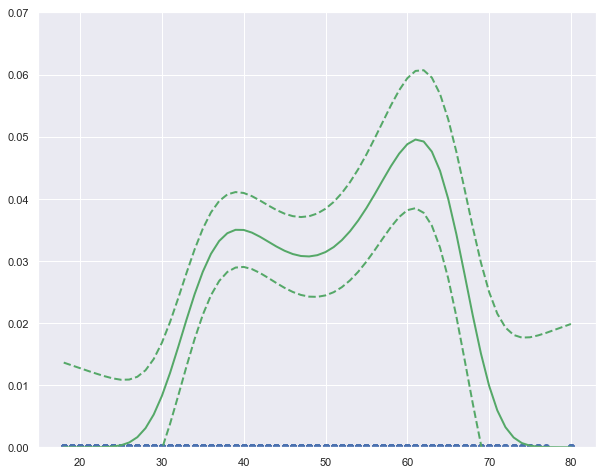

In [102]:
# We use just a simpe exponential function to emphasize the exponential propreties of the graph

y_estimated = np.exp(lr.fittedvalues)
y = wage['wage_250'].values
x = wage['age'].values
n = len(y)



sy = np.sqrt(np.sum((y - y_estimated)**2) / (n - 2))
x_s = (x - x.mean()) ** 2
err = sy * np.sqrt(1/n + x_s / x_s.sum())

order = np.argsort(x)

plt.figure(figsize=(10, 8))
plt.scatter(x[order], y[order])
plt.plot(x[order], y_estimated[order], 'g', lw=2)
plt.plot(x[order], y_estimated[order] + 2 * err[order], 'g--', lw=2)
plt.plot(x[order], y_estimated[order] - 2 * err[order], 'g--', lw=2)
plt.ylim(0, .07)



In [104]:
## Section 7.2 cut 
model_step = smf.ols('wage ~ pd.cut(age, 4)', data=wage).fit()
model_step.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.13e-41
Time:                        18:55:22   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 94.1584      1.476     63.790      0.000      91.264      97.053
pd.cut(age, 4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
pd.cut(age, 4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
pd.cut(age, 4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
###### Will need to be finished the Splines and general additive models



## Applied

In [90]:
##6
####3Polynomial Regression 
# here we take [['age']], so that it wil have shape (3000,1), if we take only ['age'] then it 
# will be (3000,) - A Series
X = wage[['age']]  
y = wage['wage']

scores =[]
for degree in range(1,11):
    polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial_features',polynomial),
                    ('linear_regression',lr)])
    scores.append(-np.mean(cross_val_score(pipe, X,y,cv=10, scoring="neg_mean_squared_error")))

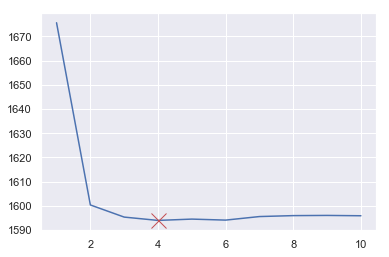

In [39]:
plt.plot( range(1,11), scores)
plt.plot(range(1,11)[np.argmin(scores)],np.min(scores) ,marker='x', color='r', markersize=15)
plt.show()

In [37]:
# We perform the same ANOVA analysis as above in the LAB

model1 = smf.ols('wage ~ age', data=wage).fit()
model2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
model3 = smf.ols('wage ~ age + np.power(age, 2)+ np.power(age, 3)', data=wage).fit()
model4 = smf.ols('wage ~ age + np.power(age, 2)+np.power(age, 3) + np.power(age, 4)', data=wage).fit()
model5 = smf.ols('wage ~ age + np.power(age, 2)+ np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()

anova_lm(model1, model2, model3, model4, model5)

/home/sabin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/sabin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/sabin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


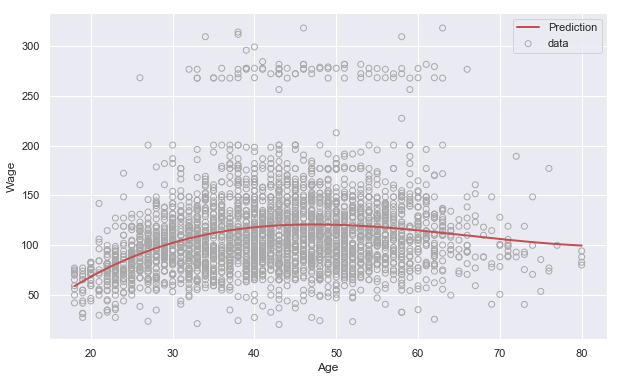

In [91]:
# The plot point the same conclusion found in the polynomial plot - that the model 
#becomes useles after the fourth degree.
##Now let's plot the best model
lr = LinearRegression()
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
lr.fit(polynomial_features.fit_transform(X), y)

# since we can not extract the data from the fitted values, we use an array from min to max values of X

array_values = np.linspace(X.values.min(), X.values.max(), 1000)


fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.scatter(wage['age'], wage['wage'], facecolors='none', edgecolors='darkgray', label="data")
ax.plot( array_values,lr.predict(polynomial_features.fit_transform(array_values.reshape(-1,1))) ,'r', lw=2, label='Prediction')

ax.legend(loc='best');
ax.set_xlabel('Age');
ax.set_ylabel('Wage');

In [55]:
## 6.b
# Select the optimal nr of cuts


In [110]:
cuts = range(1,30)
X = wage['age']
y = wage['wage']
scores = []
for cut in cuts:
    X_new = pd.get_dummies(pd.cut(X,cut)).values
    # the intercept is False since it only makes sence if we have only one knot and
    #the value at this knot would be equal to the value of the intercep.
    lr = LinearRegression(fit_intercept=False)
    scores.append(-np.mean(cross_val_score(lr, X_new,y,cv=10, scoring='neg_mean_squared_error')))
    

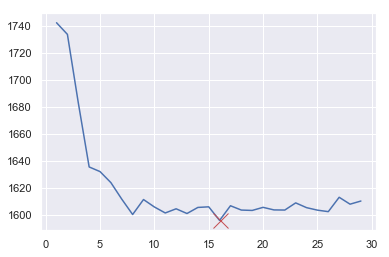

In [94]:
plt.plot( cuts, scores)
plt.plot(cuts[np.argmin(scores)],np.min(scores) ,marker='x', color='r', markersize=15)
plt.show()

In [95]:
# The plot shows that optimal number of cuts is 16

X_new = pd.get_dummies(pd.cut(X['age'], 7)).values
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(X_new, y)
plt.scatter(X, y)
order = np.argsort(X['age'])
plt.plot(X['age'].values[order], linear_regression.predict(X_new[order]), c='r', lw=3);



16

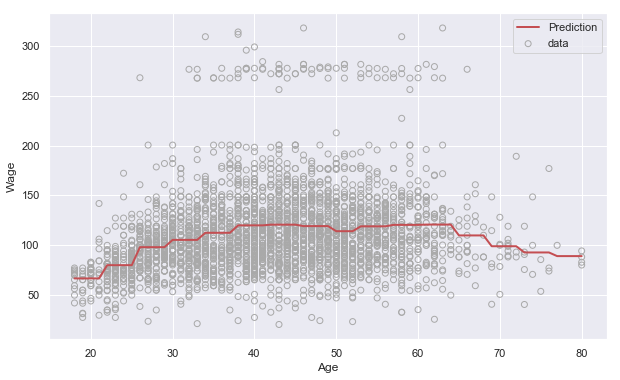

In [112]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
X_new = pd.get_dummies(pd.cut(X, 16)).values
lr = LinearRegression(fit_intercept=False)
lr.fit(X_new, y)

array_values = np.argsort(X)


ax.scatter(wage['age'], wage['wage'], facecolors='none', edgecolors='darkgray', label="data")
ax.plot( X.values[array_values],lr.predict(X_new[array_values]) ,'r', lw=2, label='Prediction')

ax.legend(loc='best');
ax.set_xlabel('Age');
ax.set_ylabel('Wage');

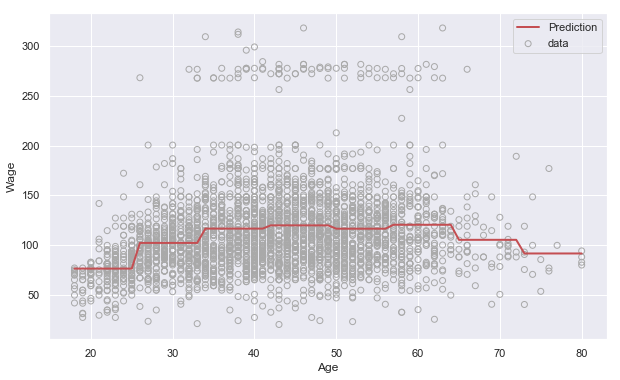

In [113]:
## Another low optimal cut was 8, let's see how it permorms
fig, ax = plt.subplots(1,1, figsize = (10,6))
X_new = pd.get_dummies(pd.cut(X, 8)).values
lr = LinearRegression(fit_intercept=False)
lr.fit(X_new, y)

array_values = np.argsort(X)


ax.scatter(wage['age'], wage['wage'], facecolors='none', edgecolors='darkgray', label="data")
ax.plot( X.values[array_values],lr.predict(X_new[array_values]) ,'r', lw=2, label='Prediction')

ax.legend(loc='best');
ax.set_xlabel('Age');
ax.set_ylabel('Wage');

In [3]:
##  7
# Select the classes < maritl >  and < jobclass >

wage[['maritl','jobclass']].head()


,maritl,jobclass
0,1. Never Married,1. Industrial
1,1. Never Married,2. Information
2,2. Married,1. Industrial
3,2. Married,2. Information
4,4. Divorced,2. Information


In [9]:
# possible types of marital status
print(np.unique(wage[['maritl']]))

#possible types of jobclass
print(np.unique(wage['jobclass']))


['1. Never Married' '2. Married' '3. Widowed' '4. Divorced' '5. Separated']
['1. Industrial' '2. Information']


In [59]:
X = pd.get_dummies(wage[['maritl', "jobclass"]]).values
y = wage['wage']

In [60]:
regression_model = smf.OLS(y, X).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     72.04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           2.16e-71
Time:                        16:48:34   Log-Likelihood:                -15279.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2994   BIC:                         3.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.674e+14   2.23e+14     -0.749      0.454   -6.06e+14    2.71e+14
x2         -1.674e+14   2.23e+14     -0.749      0.454   -6.06e+14    2.71e+14
x3         -1.674e+14   2.23e+14     -0.749      0.454   -6.06e+14    2.71e+14
x4         -1.674e+14   2.23e+14     -0.749      0.454   -6.06e+14    2.71e+14
x5         -1.674e+14   2.23e+14     -0.749      0.454   -6.06e+14    2.71e+14
x6          1.674e+14   2.23e+14      0.749      0.454   -2.71e+14    6.06e+14
x7          1.674e+14   2.23e+14      0.749      0.454   -2.71e+14    6.06e+14
==============================================================================
Omnibus:                     1067.298   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4711.866
Skew:                           1.677   Prob(JB):                         0.00
Kurtosis:                       8.142   Cond. No.                     8.63e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

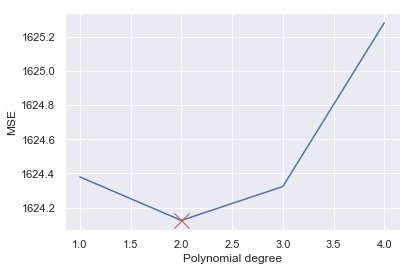

In [73]:
# Fit a polynomial regression for transformed variables
# will select separately each of them 
# ===> maritl
scores =[]
X = pd.get_dummies(wage['maritl']).values
degrees = range(1,5)
for degree in degrees:
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial_features',polynomial),
                    ('linear_regression',lr)])
    scores.append(-np.mean(cross_val_score(pipe, X,y,cv=10, scoring="neg_mean_squared_error")))
    
    
plt.plot( degrees, scores)
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.plot(degrees[np.argmin(scores)],np.min(scores) ,marker='x', color='r', markersize=15)
plt.show()


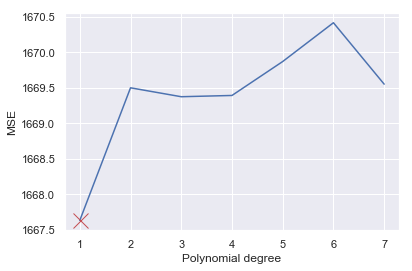

In [80]:
# ===> jobclass
scores =[]
X = pd.get_dummies(wage['jobclass'])
degrees = range(1,5)
for degree in degrees:
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial_features',polynomial),
                    ('linear_regression',lr)])
    scores.append(-np.mean(cross_val_score(pipe, X,y,cv=10, scoring="neg_mean_squared_error")))
    
    
plt.plot( degrees, scores)
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")

plt.plot(degrees[np.argmin(scores)],np.min(scores) ,marker='x', color='r', markersize=15)
plt.show()

The maritl feature is polynomial of second degree , while the jobclass is not polynomial.

In [84]:
# 8 
auto = pd.read_csv("data/auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [111]:
y = auto['mpg']
X = auto.iloc[:,1:-1].values

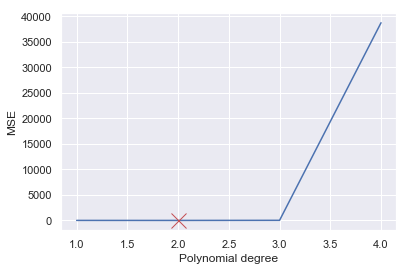

In [113]:

scores =[]
degrees = range(1,5)
for degree in degrees:
    polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial_features',polynomial),
                    ('linear_regression',lr)])
    scores.append(-np.mean(cross_val_score(pipe, X,y,cv=10, scoring="neg_mean_squared_error")))
    
    
plt.plot( degrees, scores)
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")

plt.plot(degrees[np.argmin(scores)],np.min(scores) ,marker='x', color='r', markersize=15)
plt.show()

In [ ]:
## if the bias is included then the 